In [ ]:
### Start of the Project


In [45]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import decisiontree, knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score
#import classifier algorithm
from xgboost import XGBClassifier

#import preprocessing module
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from collections import Counter 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline_imb












In [ ]:
### 1. Load the dataset

In [2]:
# Load files into a pandas dataframe
dfx = pd.read_csv('data/Train.csv')
ss = pd.read_csv('data/SampleSubmission.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', dfx.shape)


train data shape : (23524, 13)


In [4]:
# inspect train data
dfx.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Check for missing values
print('missing values:', dfx.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


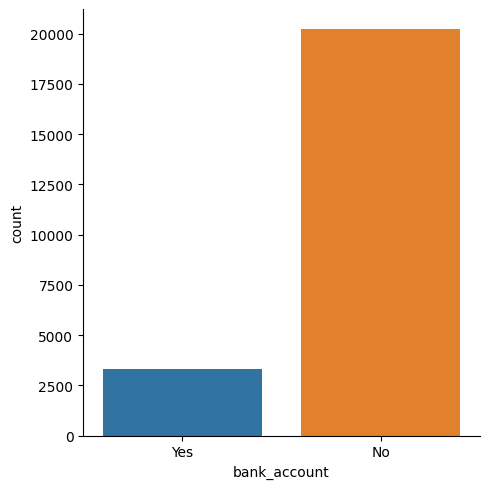

In [6]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=dfx)

In [7]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [8]:
### 2. Understand the dataset

In [8]:
 #show some information about the dataset
 print(dfx.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [9]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
###Analysen

Text(0.5, 1.0, 'relationship between country and household size')

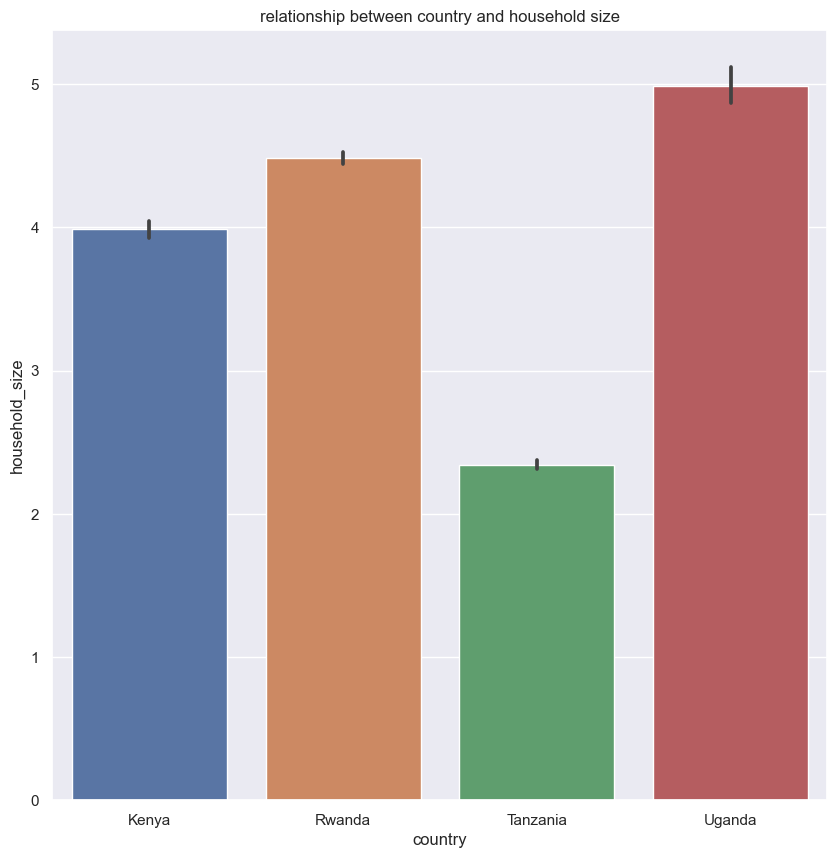

In [10]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x = 'country',y = 'household_size',data = dfx)
plt.title('relationship between country and household size')

Text(0.5, 1.0, 'Level of Education')

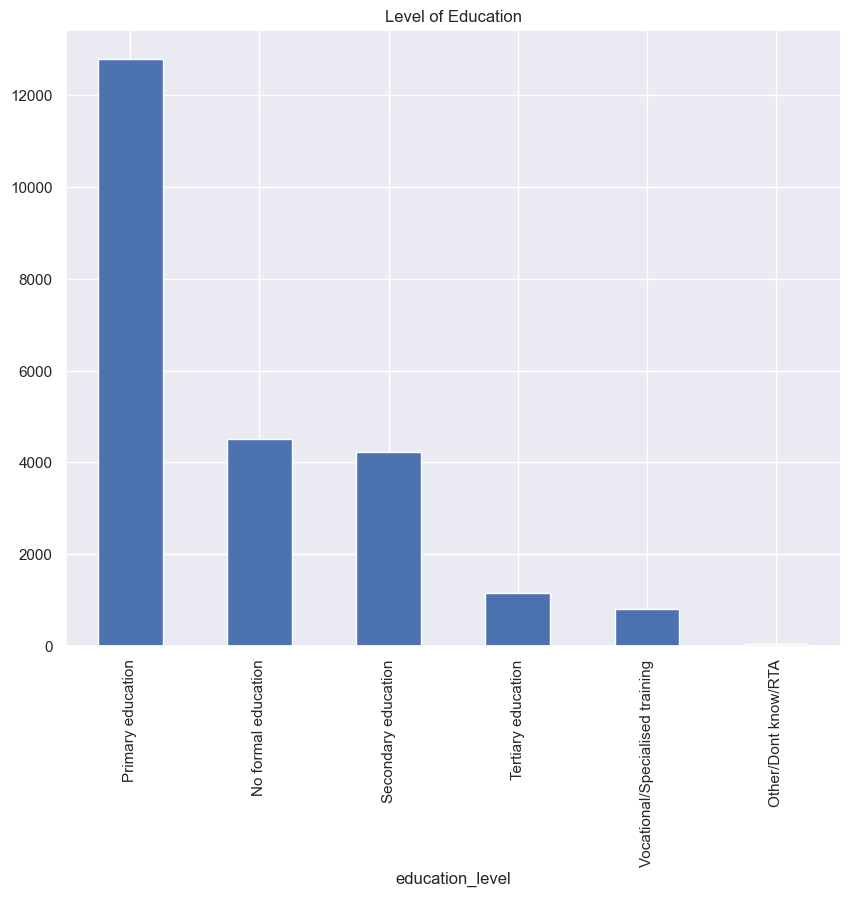

In [11]:
L = dfx['education_level'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(10,8))
plt.title('Level of Education')

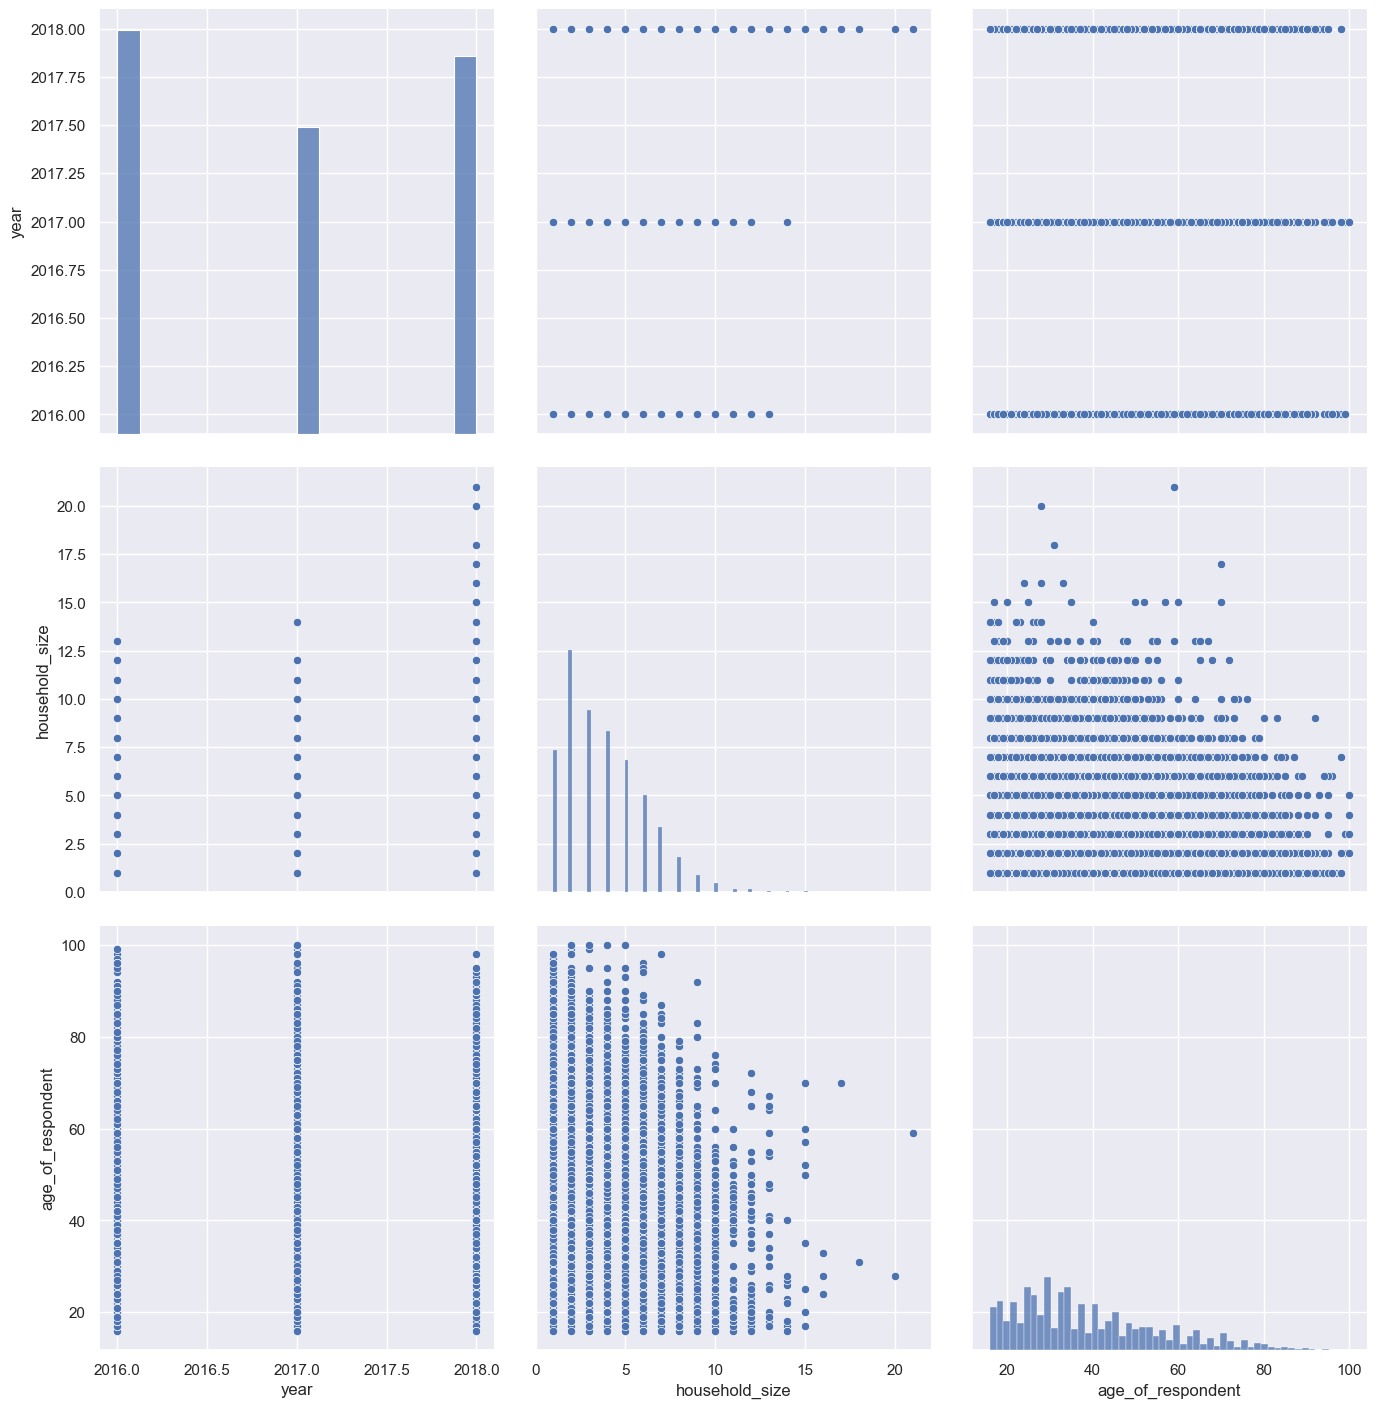

In [12]:
g = sns.pairplot(dfx)
g.fig.set_size_inches(15,15)

In [ ]:
#sns.heatmap(train.corr())
#usemapofafrica

In [13]:
dfx.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


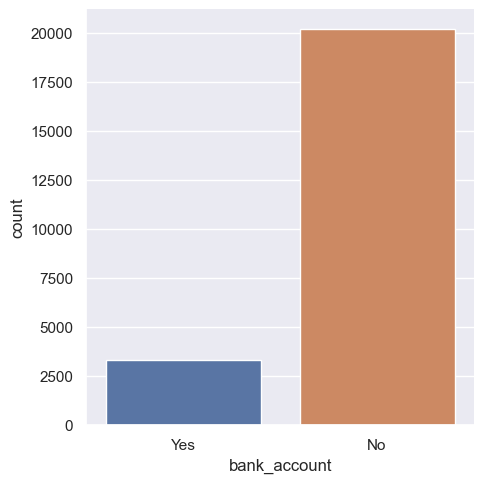

In [14]:

sns.catplot(x="bank_account", kind="count", data=dfx)

<Axes: ylabel='count'>

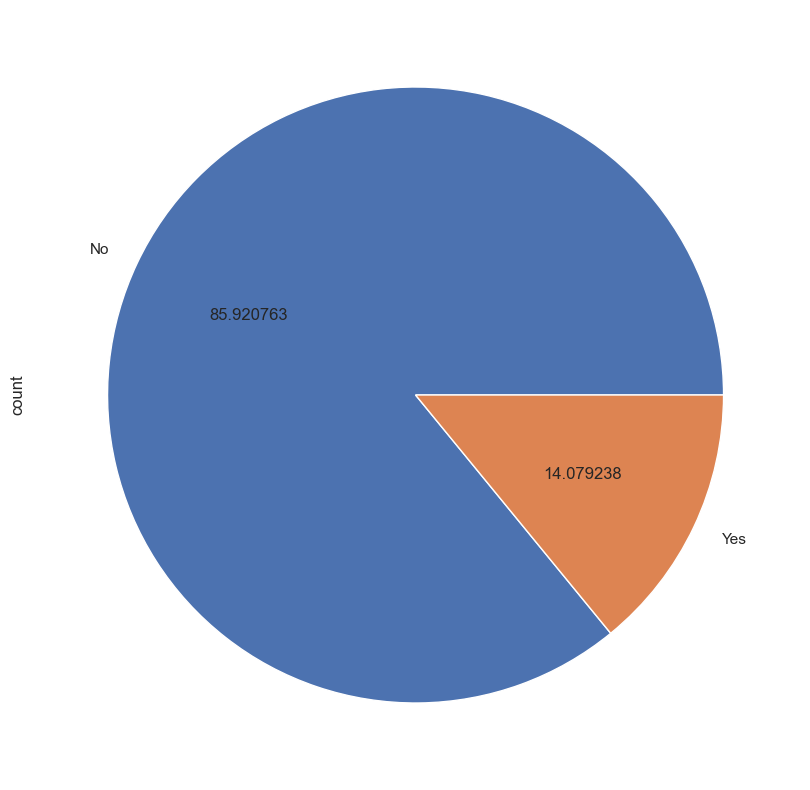

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
dfx['bank_account'].value_counts().plot.pie(autopct = '%2f')

In [ ]:
### 3. Data preparation for machine learning

In [16]:


# Cobvert target label to numerical Data
le = LabelEncoder()
dfx['bank_account'] = le.fit_transform(dfx['bank_account'])

#Separate training features from target
X = dfx.drop(['bank_account'], axis=1)
y = dfx['bank_account']



In [17]:
y.value_counts()

bank_account
0    20212
1     3312
Name: count, dtype: int64

<Axes: ylabel='count'>

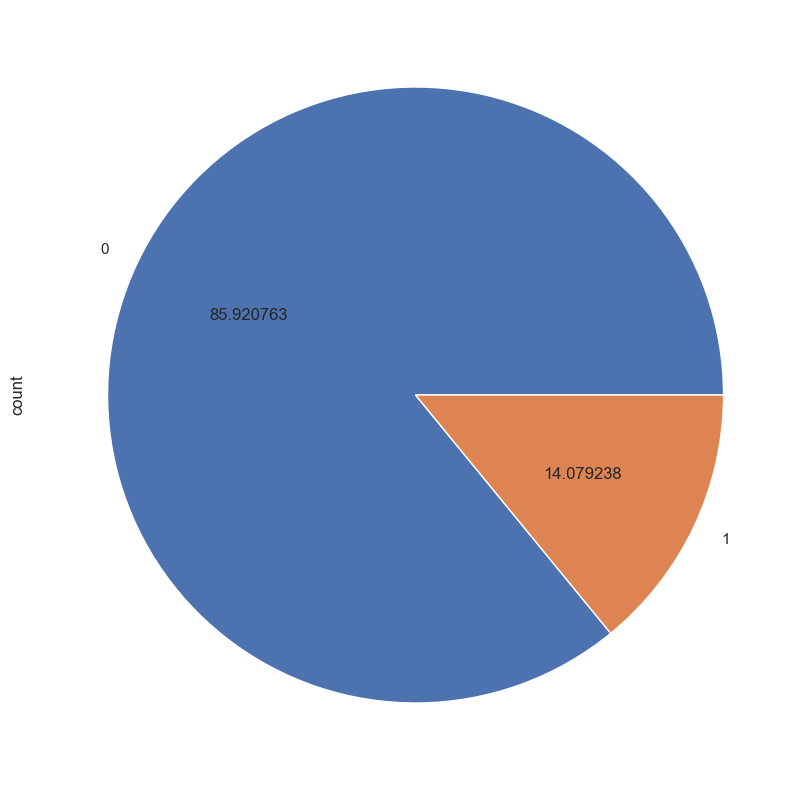

In [18]:
y.value_counts().plot.pie(autopct = '%2f')


In [43]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split before smote

In [44]:
X_train.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [87]:
smote = SMOTE(sampling_strategy={1:16000}, random_state=56)

# Define preprocessing for numerical columns (scale them)
num_cols = ["household_size", "age_of_respondent", "year"]
num_transformer = Pipeline_imb(steps=[
    ('scaler', MinMaxScaler())
])

# Define preprocessing for categorical columns (one-hot encode them)
cat_cols = ['country','uniqueid', 'location_type', 'cellphone_access',
         'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level',
       'job_type']
cat_transformer = Pipeline_imb(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


# Define the model 
model = RandomForestClassifier(random_state=56, n_estimators=750)

# Create the pipeline_imb
pipeline = Pipeline_imb(steps=[('preprocessor', preprocessor),
                               
                               ('smote', smote),
                           ('model', model)])

# Fit the pipeline to train data
pipeline.fit(X_train, y_train)


y_pred_train = pipeline.predict(X_train)


# Get predictions on validation data
y_pred_test = pipeline.predict(X_test)


In [88]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16169
           1       1.00      1.00      1.00      2650

    accuracy                           1.00     18819
   macro avg       1.00      1.00      1.00     18819
weighted avg       1.00      1.00      1.00     18819

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4043
           1       0.65      0.42      0.51       662

    accuracy                           0.89      4705
   macro avg       0.78      0.69      0.72      4705
weighted avg       0.87      0.89      0.88      4705



In [89]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16169     0]
 [    0  2650]]


In [99]:
# the first train row
print(Xp_train[:1])

   year  location_type  cellphone_access  household_size  age_of_respondent   
0   1.0            0.0               1.0            0.15           0.142857  \

   gender_of_respondent  relationship_with_head_Child   
0                   0.0                           0.0  \

   relationship_with_head_Head of Household   
0                                       0.0  \

   relationship_with_head_Other non-relatives   
0                                         0.0  \

   relationship_with_head_Other relative  ...  job_type_Government Dependent   
0                                    0.0  ...                            0.0  \

   job_type_Informally employed  job_type_No Income  job_type_Other Income   
0                           1.0                 0.0                    0.0  \

   job_type_Remittance Dependent  job_type_Self employed  country_Kenya   
0                            0.0                     0.0            1.0  \

   country_Rwanda  country_Tanzania  country_Uganda  
0        

In [24]:
# shape of the processed train set
print(Xp_train.shape)

(18819, 37)


In [ ]:
#nomeanabsoluterror!

#-> insert error whaterver

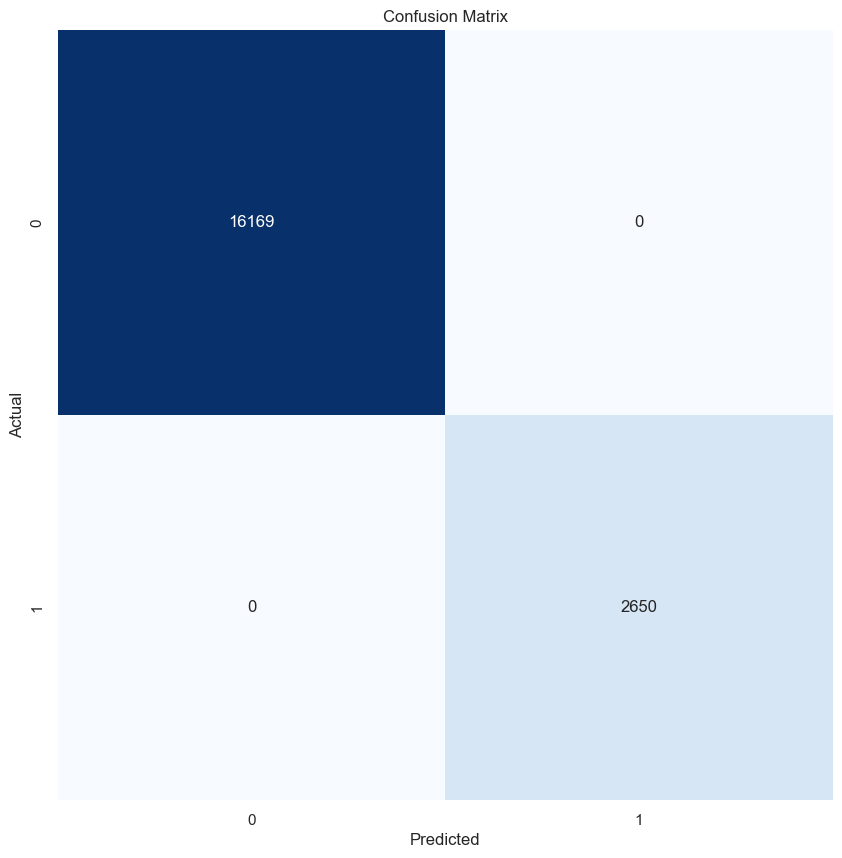

In [105]:
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#maximis truepositiv and minimaze false negativ
# Recall

In [ ]:
# Define the parameter grid for the models
param_grid = {
    'model': [DecisionTreeClassifier()],
    'model__max_depth': [2, 5, 10],
    'model__min_samples_split': [2, 5, 10],
}

param_grid_rf = {
    'model': [RandomForestClassifier()],
    'model__n_estimators': [300, 600, 900],
    'model__max_depth': [2, 5, 10],
    'model__min_samples_split': [2, 5, 10],
}

param_grid_knn = {
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
}

# Define the models
models = [
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# Create an empty DataFrame with columns to store the results
results_df = pd.DataFrame(columns=['Model', 'Params', 'Mean_Test_Score'])

# Loop over the models and perform grid search
for model_name, model in models:
    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Create a combined parameter grid for the model
    if model_name == 'DecisionTreeClassifier':
        param_grid_combined = [param_grid]
    elif model_name == 'RandomForestClassifier':
        param_grid_combined = [param_grid, param_grid_rf]
    elif model_name == 'KNeighborsClassifier':
        param_grid_combined = [param_grid, param_grid_knn]

    # Create the grid search object
    gscv = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid_combined,
        scoring='recall',
        cv=5,
        n_jobs=-1,
        verbose=1,
        error_score='raise'  # Raise error immediately if a fit fails
    )

    # Fit the grid search object to the data
    gscv.fit(X_train, y_train)

    # Get the grid search results as a DataFrame
    model_results = pd.DataFrame(gscv.cv_results_)

    # Add columns for the model name, parameters, and mean test score
    model_results['Model'] = model_name
    model_results['Params'] = model_results['params'].apply(lambda x: str(x))
    model_results['Mean_Test_Score'] = model_results['mean_test_score']

    # Concat the model results to the main results DataFrame
    results_df = pd.concat([results_df, model_results[['Model', 'Params', 'Mean_Test_Score']]])

# Print the best parameters and the best score for each model
for model_name, _ in models:
    best_params = results_df[results_df['Model'] == model_name]['Params'].iloc[0]
    best_score = results_df[results_df['Model'] == model_name]['Mean_Test_Score'].max()
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best score for {model_name}: {best_score}')
    print()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean_Test_Score', data=results_df)
plt.title('Mean Recall Score for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Recall Score')
plt.show()


In [107]:
gscv.best_params_
round(gscv.best_score_,6)
best_model = gscv.best_estimator_
best_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent',
                                                   'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'uniqueid',
                                                   'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('model', DecisionTreeClassifier(min_samples_split=10))])

In [84]:
#%timeit gscv.fit(X_train,y_train)

In [87]:
#save result_df to csv
results_df.to_csv('results.csv', index=False)


In [ ]:
results_df = pd.read_csv('results.csv')


,Model,Params,Mean_Test_Score
0,DecisionTreeClassifier,"{'model': DecisionTreeClassifier(), 'model__ma...",0.400755
1,DecisionTreeClassifier,"{'model': DecisionTreeClassifier(), 'model__ma...",0.383774
2,DecisionTreeClassifier,"{'model': DecisionTreeClassifier(), 'model__ma...",0.377736
3,DecisionTreeClassifier,"{'model': DecisionTreeClassifier(), 'model__ma...",0.240377
4,DecisionTreeClassifier,"{'model': DecisionTreeClassifier(), 'model__ma...",0.240377


In [ ]:
results_df.shape()

TypeError: 'tuple' object is not callable

In [ ]:
# Error analysis

# Model selection and training

In [ ]:
### BIS HIERHIN KLAPPT ALLES

In [ ]:


# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

In [ ]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)        

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

In [ ]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)